# World Happiness Report 2015-2019 (EDA + Visualisation + Prediction)

This notebook shows some exploratory analysis and visualisation analysis for the World Happiness Reports from the years 2015 until 2019, then applies a Multiple Linear Regression model to predict country's Happiness Score and determine which factors are influence this score.

## Features Explanation

**Happiness Rank:** Rank of any country in a particular year.<br>
**Country:** Name of the country.<br>
**Standard Error:** The standard error of the happiness score.<br>
**Happiness Score:** Happiness score as the sum of all numerical columns in the datasets.<br>
**Economy (GDP per Capita):** The extent to which GDP contributes to the calculation of the Happiness Score.<br>
**Trust:** A quantification of the people’s perceived trust in their governments.<br>
**Health (Life Expectancy):** The extent to which Life expectancy contributed to the calculation of the Happiness Score.<br>
**Generosity:** Numerical value estimated based on the perception of Generosity experienced by poll takers in their country.<br>
**Family Support:** Metric estimating satisfaction of people with their friends and family.<br>
**Freedom:** Perception of freedom quantified.<br>
**Dystopia:** Hypothetically the saddest country in the world.<br>
**Lower Confidence Interval:** Lower Confidence Interval of the Happiness Score.<br>
**Upper Confidence Interval:** Upper Confidence Interval of the Happiness Score.<br>


In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load datasets from csv files
x = 2015
dfs = []
while True:
    globals()[f'df{x}'] = pd.read_csv(f'/kaggle/input/world-happiness/{x}.csv')
    dfs.append(globals()[f'df{x}'])
    x += 1
    if x == 2020:
        break

# Data Exploration

In [4]:
# show first few records for each dataset
for i, df in enumerate(dfs):
    print (f'201{i+5} dataset:')
    display (dfs[i].head(3))

2015 dataset:


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


2016 dataset:


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


2017 dataset:


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715


2018 dataset:


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408


2019 dataset:


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


In [5]:
# show the number of records and columns for each dataset
for i, df in enumerate(dfs):
    print (f'Size of 201{i+5} Report:', dfs[i].shape)

Size of 2015 Report: (158, 12)
Size of 2016 Report: (157, 13)
Size of 2017 Report: (155, 12)
Size of 2018 Report: (156, 9)
Size of 2019 Report: (156, 9)


Since each row in these datasets represents a country, it's obvious that the number of countries covered in each report is different which means there no data available from some countries in some years!

In [6]:
# show column names for each dataset
for i, df in enumerate(dfs):
    print (f'Column names for 201{i+5} dataset:', dfs[i].columns, '\n')

Column names for 2015 dataset: Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object') 

Column names for 2016 dataset: Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object') 

Column names for 2017 dataset: Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object') 

Column names for 2018 dataset: Inde

So some datasets have different labels for the same columns (i.e. "Social Support" column is labeled as "Family" in latest reports), there are some changes in how data is represented between latest reports and their earlier counterparts (i.e. "Standard Error" column has defined in a different way for 2016-2017 reports than 2015 report (upper/lower & high/low values), some datasets have data that others do not have (i.e. "Dystopia Residual" column does not exist in both 2018-2019 reports). To make data tidy, here are several things need to be addressed in the data cleaning process:


1. Unifying column names
1. Creating "Year" column for each dataset
1. Adding "Region" column for both 2017-2019 reports
1. Adding "Standard Error" column for both 2016-2017 datasets based on Confidence Interval and Whisker values
1. Adding "Standard Error" column for both 2017-2019 datasets based on the average value of the previous years for each country
1. Handling missing values
1. Merge all datasets into one giant dataset
1. Dropping "Dystopia Residual" column as it's not represented in 2018/2019 datasets

# Data Cleaning

Since the datasets have a bit of a different naming convention we need to abstract them to a common name.

In [7]:
df2015.rename(columns = {'Economy (GDP per Capita)' : 'GDP',
                        'Health (Life Expectancy)' : 'Life',
                        'Trust (Government Corruption)' : 'Trust'}, inplace = True)

In [8]:
df2016.rename(columns = {'Economy (GDP per Capita)' : 'GDP',
                        'Health (Life Expectancy)' : 'Life',
                        'Trust (Government Corruption)' : 'Trust'}, inplace = True)

In [9]:
df2017.rename(columns = {'Happiness.Rank' : 'Happiness Rank',
                        'Happiness.Score' : 'Happiness Score',
                        'Economy..GDP.per.Capita.' : 'GDP',
                        'Health..Life.Expectancy.' : 'Life',
                        'Dystopia.Residual' : 'Dystopia Residual',
                        'Trust..Government.Corruption.' : 'Trust'}, inplace = True)

In [10]:
df2018.rename(columns = {'Overall rank' : 'Happiness Rank',
                        'Score' : 'Happiness Score',
                        'Country or region' : 'Country',
                        'Social support' : 'Family',
                        'Freedom to make life choices' : 'Freedom',
                        'GDP per capita' : 'GDP',
                        'Healthy life expectancy' : 'Life',
                        'Perceptions of corruption' : 'Trust'}, inplace = True)

In [11]:
df2019.rename(columns = {'Overall rank' : 'Happiness Rank',
                        'Score' : 'Happiness Score',
                        'Country or region' : 'Country',
                        'Social support' : 'Family',
                        'Freedom to make life choices' : 'Freedom',
                        'GDP per capita' : 'GDP',
                        'Healthy life expectancy' : 'Life',
                        'Perceptions of corruption' : 'Trust'}, inplace = True)

Creating "Year" column for each dataset.

In [12]:
# add year column for each dataset
for i, df in enumerate(dfs, 2015):
    df['Year'] = i

Adding Region column for both 2018-2019 datasets.

In [13]:
# add "Region" column
for df in dfs:
    if not ('Region') in df:
        df['Region'] = None
        temp = df.set_index('Country').Region.fillna(df2015.set_index('Country').Region).reset_index()
        df.fillna(temp, inplace = True)

Now we need to calculate "Standard Error" column for both 2016-2017 datasets based on Confidence Interval and Whisker values.

In [14]:
df2016['Standard Error'] = round((df2016['Upper Confidence Interval'] - df2016['Lower Confidence Interval']) / 2, 3)

In [15]:
df2017['Standard Error'] = round((df2017['Whisker.high'] - df2017['Whisker.low']) / 2, 3)

Then adding "Standard Error" column for both 2017-2019 datasets by calculating the average value of the previous years for each country. To do so, we need to create a temporary dataframe that combine the "Standard Error" columns for previous years in order to calculate the "Standard Error" values for 2018-2019 datasets.

In [16]:
temp = pd.merge(df2015[['Country', 'Standard Error']], df2016[['Country', 'Standard Error']], on = 'Country')
temp.rename(columns = {'Standard Error_x' : 'Standard Error 2015',
                        'Standard Error_y' : 'Standard Error 2016'}, inplace = True)
standard_error_df = pd.merge(temp, df2017[['Country', 'Standard Error']], on = 'Country')
standard_error_df.rename(columns = {'Standard Error' : 'Standard Error 2017'}, inplace = True)
standard_error_df.head(3)

,Country,Standard Error 2015,Standard Error 2016,Standard Error 2017
0,Switzerland,0.03411,0.081,0.068
1,Iceland,0.04884,0.168,0.118
2,Denmark,0.03328,0.066,0.060


In [17]:
# claculate Standard Error values for df2018
standard_error_df['Standard Error 2018'] = round(standard_error_df.mean(axis = 1), 4)
standard_error_df.head(3)

,Country,Standard Error 2015,Standard Error 2016,Standard Error 2017,Standard Error 2018
0,Switzerland,0.03411,0.081,0.068,0.0610
1,Iceland,0.04884,0.168,0.118,0.1116
2,Denmark,0.03328,0.066,0.060,0.0531


In [18]:
# claculate Standard Error values for 2019 dataset 
standard_error_df['Standard Error 2019'] = round(standard_error_df.mean(axis = 1), 3)
standard_error_df.head(3)

,Country,Standard Error 2015,Standard Error 2016,Standard Error 2017,Standard Error 2018,Standard Error 2019
0,Switzerland,0.03411,0.081,0.068,0.0610,0.061
1,Iceland,0.04884,0.168,0.118,0.1116,0.112
2,Denmark,0.03328,0.066,0.060,0.0531,0.053


In [19]:
dfs[3] = pd.merge(dfs[3], standard_error_df[['Country','Standard Error 2018']], on = 'Country')
dfs[3].rename(columns = {'Standard Error 2018' : 'Standard Error'}, inplace = True)
dfs[4] = pd.merge(dfs[4], standard_error_df[['Country','Standard Error 2019']], on = 'Country')
dfs[4].rename(columns = {'Standard Error 2019' : 'Standard Error'}, inplace = True)

Droping columns that are not common to all five reports.

In [20]:
for i, df in enumerate(dfs, 2015):
    # drop "Dystopia Residual" columns
    if 'Dystopia Residual' in df:
        df.drop(['Dystopia Residual'], inplace = True, axis = 1)
    # drop "Confidence Interval" columns
    if ('Lower Confidence Interval' and 'Upper Confidence Interval') in df:
        df.drop(['Lower Confidence Interval', 'Upper Confidence Interval'], inplace = True, axis = 1)
    # drop "Whisker" columns
    if ('Whisker.high' and 'Whisker.low') in df:
        df.drop(['Whisker.high', 'Whisker.low'], inplace = True, axis = 1)

In [21]:
# check missing values
for i, df in enumerate(dfs, 2015):
    print ('\n' f'df{i} dataset:' '\n', df.isnull().sum())


df2015 dataset:
 Country            0
Region             0
Happiness Rank     0
Happiness Score    0
Standard Error     0
GDP                0
Family             0
Life               0
Freedom            0
Trust              0
Generosity         0
Year               0
dtype: int64

df2016 dataset:
 Country            0
Region             0
Happiness Rank     0
Happiness Score    0
GDP                0
Family             0
Life               0
Freedom            0
Trust              0
Generosity         0
Year               0
Standard Error     0
dtype: int64

df2017 dataset:
 Country            0
Happiness Rank     0
Happiness Score    0
GDP                0
Family             0
Life               0
Freedom            0
Generosity         0
Trust              0
Year               0
Region             6
Standard Error     0
dtype: int64

df2018 dataset:
 Happiness Rank     0
Country            0
Happiness Score    0
GDP                0
Family             0
Life               0
Freedom

As we still have some missing values in "Region" columns (countries that have not represented in 2015 reports), we need to fill these records manually.

In [22]:
# show records with missing values in df2017 
dfs[2][dfs[2].isnull().any(axis = 1)]

,Country,Happiness Rank,Happiness Score,GDP,Family,Life,Freedom,Generosity,Trust,Year,Region,Standard Error
32,Taiwan Province of China,33,6.422,1.433627,1.384565,0.793984,0.361467,0.258360,0.063829,2017,NaN,0.073
49,Belize,50,5.956,0.907975,1.081418,0.450192,0.547509,0.240016,0.096581,2017,NaN,0.241
70,"Hong Kong S.A.R., China",71,5.472,1.551675,1.262791,0.943062,0.490969,0.374466,0.293934,2017,NaN,0.078
92,Somalia,93,5.151,0.022643,0.721151,0.113989,0.602127,0.291631,0.282410,2017,NaN,0.091
110,Namibia,111,4.574,0.964434,1.098471,0.338612,0.520304,0.077134,0.093147,2017,NaN,0.196
146,South Sudan,147,3.591,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,2017,NaN,0.135


In [23]:
# fill missing values in df2017 manually
dfs[2].loc[32, ['Region']] = 'Eastern Asia'
dfs[2].loc[49, ['Region']] = 'Latin America and Caribbean'
dfs[2].loc[70, ['Region']] = 'Eastern Asia'
dfs[2].loc[92, ['Region']] = 'Sub-Saharan Africa'
dfs[2].loc[110, ['Region']] = 'Sub-Saharan Africa'
dfs[2].loc[146, ['Region']] = 'Sub-Saharan Africa'

In [24]:
# show records with missing values in df2018
dfs[3][dfs[3].isnull().any(axis = 1)]

,Happiness Rank,Country,Happiness Score,GDP,Family,Life,Freedom,Generosity,Trust,Year,Region,Standard Error
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN,2018,Middle East and Northern Africa,0.0634


In [25]:
# fill Trust missing values in df2018 by the mean value of the previous years
previous_trust_uae = [dfs[0][dfs[0]['Country'] == 'United Arab Emirates']['Trust'].item(), dfs[1][dfs[1]['Country'] == 'United Arab Emirates']['Trust'].item(), dfs[2][dfs[2]['Country'] == 'United Arab Emirates']['Trust'].item()]
dfs[3].loc[19, ['Trust']] = sum(previous_trust_uae) / len(previous_trust_uae)

As we standardised the structure of the five datasets, last step is to combine them all into a single giant dataframe.

In [26]:
# combine all datasets into a single dataframe
giant_df = pd.concat(dfs)

# Data Visualisation

In [27]:
# create a new dataframe for the sake of visualisation
eda_df = giant_df

Taking a look at how the Happiness Score relates to each other variable in the dataset!

In [28]:
import plotly.figure_factory as ff
z = pd.DataFrame(eda_df.corr().values.tolist())
z = z.round(2).values.tolist()
fig = ff.create_annotated_heatmap(z, x = eda_df.corr().columns.tolist(), y = eda_df.corr().columns.tolist(), colorscale = 'Portland')
fig.update_layout(title = {'text': 'Correlation Heatmap', 'y' : 0.93, 'x' : 0.5}, title_font_size = 25)
fig.show()

So the Happiness Score is highly correlated with GDP, Family Support and Life expectancy, and least correlated with Generosity.

# What Are the 10 Happiest Countries in the World?

In [29]:
import plotly.express as px
happiest_countries = eda_df.groupby(['Country'], sort = False)['Happiness Score', 'Year', 'GDP'].max()
top10 = happiest_countries.sort_values('Happiness Score', ascending = False)[:15]
fig = px.scatter(top10,
                x = top10.index,
                y = 'Happiness Score',
                size = 'GDP',
                color = top10.index,
                template = 'xgridoff',
                animation_frame = 'Year',
                title = 'The Top 10 Happiest Countries in The World <br> (Bubble Size Indicates GDP)')
fig.show()

# Comparing Happiness Scores Across Regions

In [30]:
eda_df['Continent'] = ['Asia' if (i == 'Eastern Asia' or i == 'Southern Asia' or i == 'Eastern Asia')
                          else 'Europe' if (i == 'Western Europe' or i == 'Central and Eastern Europe')
                          else 'Middle East' if (i == 'Middle East and Northern Africa')
                          else 'Africa' if (i == 'Sub-Saharan Africa')
                          else 'Australia' if (i == 'Australia and New Zealand')
                          else 'North America' if (i == 'North America')
                          else 'Latin America'
                          for i in giant_df['Region']]
fig = px.box(eda_df,
             x = 'Year',
             y = 'Happiness Score',
             color = 'Continent',
             template = 'xgridoff',
             labels = {'Continent': 'Region'},
             title = 'Happiness Score by Regions from 2015-2017')
fig.show()

# How Countries' Happiness Has Changed from 2015-2017?

To o answer this question, we need to calculate the change in happiness score for each country in the period 2015 to 2019.

In [31]:
eda_df['Happiness Change'] = (df2019['Happiness Score'] - df2015['Happiness Score']) / df2015['Happiness Score']
# show countries with at least 1% change
temp = eda_df[np.abs(eda_df['Happiness Change']) > 0.01]
temp = eda_df.sort_values('Happiness Change')
temp['Year'] = temp['Year'].astype(str)
fig = px.bar(temp,
             x = 'Happiness Change',
             y = 'Country',
             color = 'Year',
             orientation = 'h',
             height = 900,
#              width = 700,
             template = 'gridon',
             title = 'Change in Happiness Score from 2015-2017')
fig.show()

# Does Money Buy Happiness?

In [32]:
fig = px.scatter(eda_df,
                x = 'GDP',
                y = 'Happiness Score',
                size = 'Trust',
                color = 'Country',
                template = 'xgridoff',
                animation_frame = 'Year',
                title = 'GDP vs Happiness Score from 2015-2017 <br> (Bubble Size Indicates Trust)')
fig.show()

# How Is Life Expectancy Related to Happiness Score?

In [33]:
fig = px.scatter(eda_df,
                x = 'Life',
                y = 'Happiness Score',
                size = 'GDP',
                color = 'Country',
                template = 'xgridoff',
                animation_frame = 'Year',
                labels = {'Life': 'Life Expectancy'},
                title = 'Life Expectancy vs Happiness Score for Each Country from 2015-2017 <br> (Bubble Size Indicates GDP)')
fig.show()

# Family Support vs Happiness Score for Each Country from 2015-2017

In [34]:
fig = px.scatter(eda_df,
                x = 'Family',
                y = 'Happiness Score',
                size = 'GDP',
                color = 'Country',
                template = 'xgridoff',
                animation_frame = 'Year',
                labels = {'Family': 'Family Support'},
                title = 'Family Support vs Happiness Score from 2015-2017 <br> (Bubble Size Indicates GDP)')
fig.show()

# Relation of Freedom to Happiness Score?

In [35]:
fig = px.scatter(eda_df,
                x = 'Freedom',
                y = 'Happiness Score',
                size = 'GDP',
                color = 'Country',
                template = 'xgridoff',
                animation_frame = 'Year',
                title = 'Freedom vs Happiness Score for Each Country from 2015-2017 <br> (Bubble Size Indicates GDP)')
fig.show()

# Modelling

Now it's time to use scikit-learn to perform a simple linear regression and XGBoost (Gradient booster) to predict Happiness Score.<br>
First, categorical variables need to be encoded for the model, this can be done by using LabelEncoder class.

In [36]:
# encode categorical variables in order to prepare them for modelling
le = preprocessing.LabelEncoder()
giant_df['Region'] = le.fit_transform(giant_df['Region'])
giant_df['Country'] = le.fit_transform(giant_df['Country'])

Next step is to split the dataset into train and test sets for unbiased evaluation of the final model where the dependent variable is "Happiness Score".

In [37]:
# define the predictors
features = ['Country', 'Region', 'Happiness Rank', 'Standard Error', 'GDP', 'Family', 'Life', 'Freedom', 'Trust', 'Generosity', 'Year']
X = giant_df[features]
# define the target
y = giant_df['Happiness Score']

In [38]:
# split into the two subsets using random selection (67-33 policy)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# Linear Regression

There are many possibilities of regressors to use. A particularly simple one is "LinearRegression", it's basically a wrapper around an ordinary least squares calculation.

In [39]:
# create linear regression object
lr = LinearRegression()
# train the model using the training set
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.986061232841729

In [40]:
# how good is our model?
print('Coefficient:', lr.score(X_train, y_train))
print('Intercept:', lr.intercept_)
print('Slope:', lr.coef_)

Coefficient: 0.986061232841729
Intercept: 13.570602094785487
Slope: [-1.06657951e-04  8.13163385e-03 -2.38842107e-02 -6.49512707e-01
  5.60801567e-03  7.63383425e-02  6.06762396e-02  7.18490763e-03
  1.87982755e-01  1.69626550e-01 -3.21150468e-03]


In [41]:
coefficients = zip(X.columns, lr.coef_)
coefficients = pd.DataFrame(list(zip(X.columns, lr.coef_)), columns = ['Features', 'Coefficients'])
coefficients.sort_values('Coefficients', ascending = False)

,Features,Coefficients
8,Trust,0.187983
9,Generosity,0.169627
5,Family,0.076338
6,Life,0.060676
1,Region,0.008132
7,Freedom,0.007185
4,GDP,0.005608
0,Country,-0.000107
10,Year,-0.003212
2,Happiness Rank,-0.023884


Now that we have created our model and trained it, it's time we test the model with our testing set.

In [42]:
# make predictions using testset
y_pred = lr.predict(X_test)

In [43]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_pred.tolist()}).head(25)
pred.head(10)

,Actual,Predicted
0,4.121,4.009613
1,5.524,5.549559
2,6.269,6.265319
3,5.268,5.401625
4,6.488,6.661214
5,6.952,6.841535
6,4.875,4.712368
7,6.084,6.295655
8,4.350,4.238626
9,5.653,5.645340


Text(0.5, 1.0, 'Happiness Score')

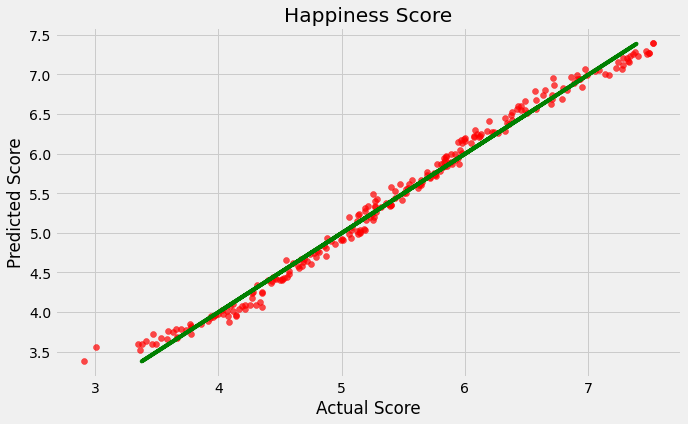

In [44]:
plt.style.use(style = 'fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)
plt.scatter(y_test, y_pred, alpha = 0.7, color = 'r')
m, b = np.polyfit(y_pred, y_test, 1)
plt.plot(y_pred, (m * y_pred + b), color = 'g')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Happiness Score')

# XGBoost

In [45]:
import xgboost as xgb
xgb = xgb.XGBRegressor(objective = 'reg:squarederror', n_estimators = 100, max_depth = 3, learning_rate = 0.1)

In [46]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
xgb.score(X_train, y_train)

0.9988700809307349

In [48]:
y_preds = xgb.predict(X_test)

In [49]:
rmse = np.sqrt(mean_squared_error(y_test, y_preds))
print(xgb.score(X_test, y_test))

0.997137453913385
